In [18]:
! pip install pandas matplotlib seaborn wordcloud networkx


In [3]:
import pandas as pd
from collections import Counter
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx

In [4]:
df = pd.read_csv("NERtagged.csv")
df["NER"] = df["NER"].apply(eval)  

/var/folders/h0/swh020d56hz52bm6kwycgty80000gn/T/ipykernel_33835/2531665420.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




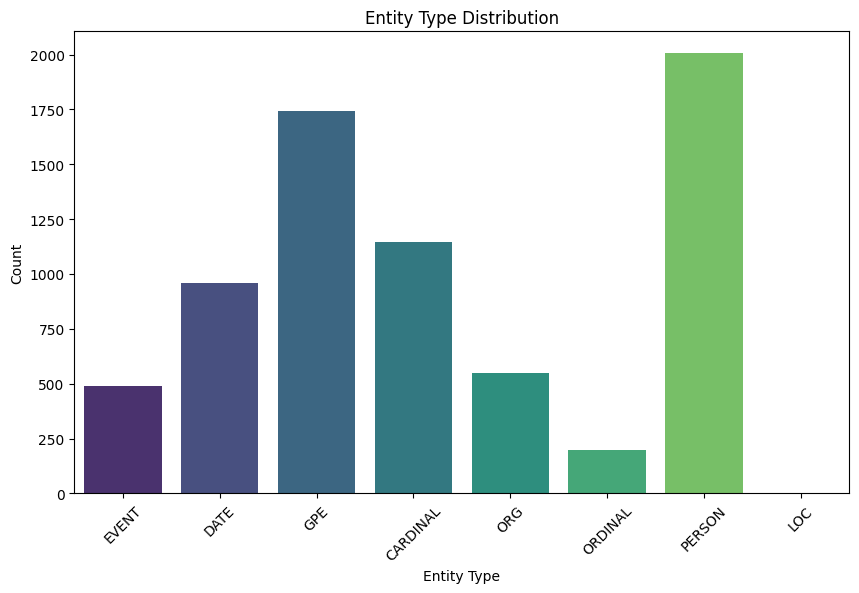

In [17]:
all_entities = [ent[1] for sublist in df["NER"] for ent in sublist]
entity_counts = Counter(all_entities)
plt.figure(figsize=(10, 6))  
sns.barplot(x=list(entity_counts.keys()), y=list(entity_counts.values()), palette="viridis")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.title("Entity Type Distribution")
plt.xticks(rotation=45)
plt.show()

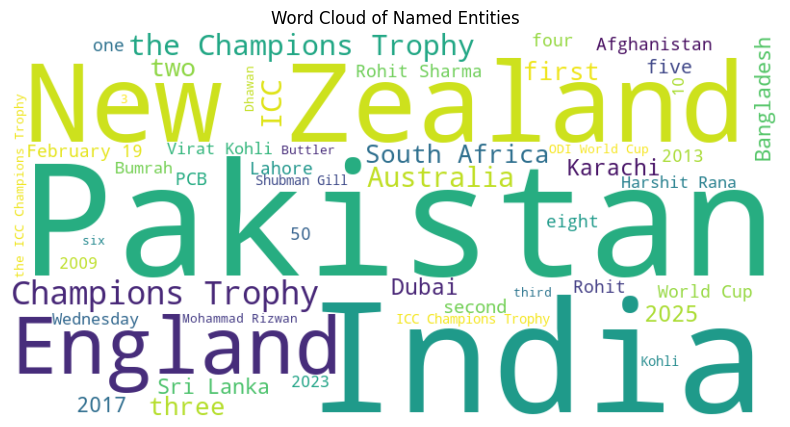

In [6]:
all_named_entities = [ent[0] for sublist in df["NER"] for ent in sublist]
top_entities = Counter(all_named_entities).most_common(50)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(dict(top_entities))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Named Entities")
plt.show()

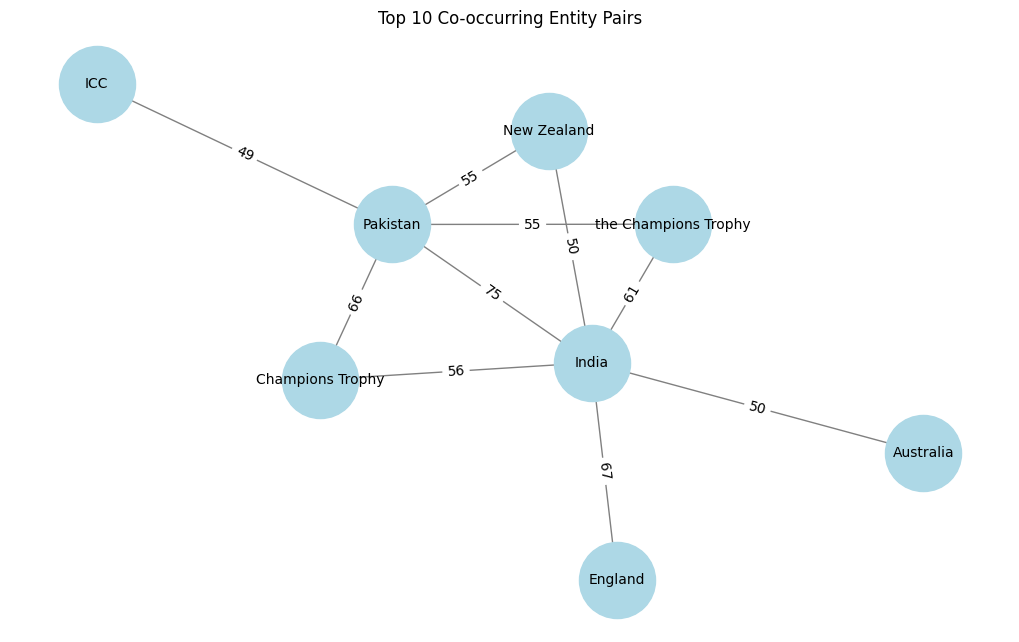

In [7]:

entity_pairs = Counter()
for entities in df["NER"]:
    for ent1, ent2 in combinations(set(entities), 2):  
        entity_pairs[(ent1[0], ent2[0])] += 1
G = nx.Graph()
for (ent1, ent2), count in entity_pairs.most_common(10):
    G.add_edge(ent1, ent2, weight=count)

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(ent1, ent2): count for (ent1, ent2), count in entity_pairs.most_common(10)})
plt.title("Top 10 Co-occurring Entity Pairs")
plt.show()
